<a href="https://colab.research.google.com/github/wiv33/A-Learning-python/blob/master/machine-learning/_000_hello_machine/_000_basic/_008_pandas/_002_moving_population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

시스템에 설치된 폰트 출력

In [6]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 11 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


# 코로나 확진자 데이터

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rc('font', family='NanumBarunGothic') 

In [8]:
df_co = pd.read_csv('https://docs.google.com/spreadsheets/u/0/d/1P7s-aD5dYr2355iqFRX1CUxpjbHhl4SYnjT5sP4Iy10/export?format=csv&id=1P7s-aD5dYr2355iqFRX1CUxpjbHhl4SYnjT5sP4Iy10&gid=0')
df_co.head(1)

,연번,확진일,지역,접촉력,노출여부
0,6103,11.02.,동작구,감염경로 조사중,Y


In [9]:
df_co.tail(1)

,연번,확진일,지역,접촉력,노출여부
6102,1,1.24.,강서구,해외 접촉,Y


확진일    지역    확진일  
1.24.  강서구   1.24.    1
1.30.  마포구   1.30.    1
       종로구   1.30.    1
       중랑구   1.30.    1
1.31.  성북구   1.31.    1
                     ..
9.30.  성동구   9.30.    4
       송파구   9.30.    2
       영등포구  9.30.    1
       용산구   9.30.    1
       중랑구   9.30.    1
Name: 확진일, Length: 2523, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


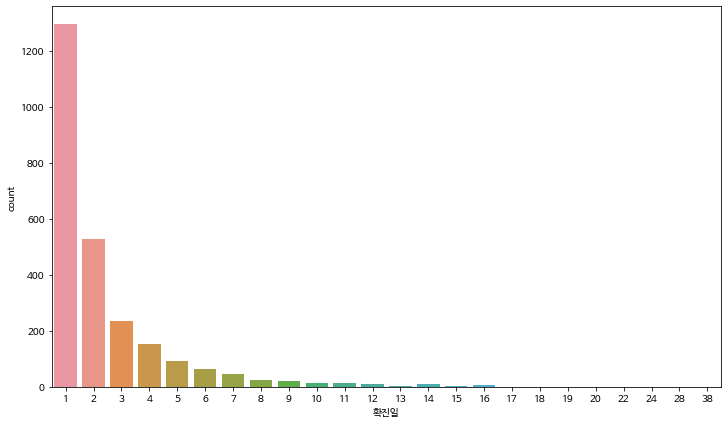

In [10]:
s = df_co.groupby(by=['확진일', '지역'])

print(s['확진일'].value_counts())
fig, ax = plt.subplots(1, 1, figsize=(12, 7))

sns.countplot(s['확진일'].value_counts(), data=pd.DataFrame(s), ax=ax)

In [11]:
s['확진일'].describe()

count unique    top freq
확진일   지역                           
1.24. 강서구      1      1  1.24.    1
1.30. 마포구      1      1  1.30.    1
      종로구      1      1  1.30.    1
      중랑구      1      1  1.30.    1
1.31. 성북구      1      1  1.31.    1
...          ...    ...    ...  ...
9.30. 성동구      4      1  9.30.    4
      송파구      2      1  9.30.    2
      영등포구     1      1  9.30.    1
      용산구      1      1  9.30.    1
      중랑구      1      1  9.30.    1

[2523 rows x 4 columns]

In [12]:
s['지역'].describe()

count unique   top freq
확진일   지역                          
1.24. 강서구      1      1   강서구    1
1.30. 마포구      1      1   마포구    1
      종로구      1      1   종로구    1
      중랑구      1      1   중랑구    1
1.31. 성북구      1      1   성북구    1
...          ...    ...   ...  ...
9.30. 성동구      4      1   성동구    4
      송파구      2      1   송파구    2
      영등포구     1      1  영등포구    1
      용산구      1      1   용산구    1
      중랑구      1      1   중랑구    1

[2523 rows x 4 columns]

# 서울시 유동인구 데이터 By SKT

[SKT DATA HUB](https://www.bigdatahub.co.kr/product/list.do?menu_id=1000157)

2020년 9월 ~ 2019년 3월

```javascript
const result = Array.from(document.querySelectorAll('.category_detail.clfix .title a')).reduce((acc, v) => {
  acc.push(v.getAttribute('href').split('pid=')[1]); 
  return acc
  }, [])

  result > ["1002332", "1002326", "1002317", "1002308", "1002302", "1002299", "1002295", "1002291", "1002286", "1002280", "1002277", "1002261", "1002260", "1002259", "1002258", "1002257", "1002256", "1002255", "1002254"]

```

In [13]:
# import requests
# import json
# api_key = '7b3aad087b55453cd26409ab572d8407e117a28b737c2ccd19509d0f61edc161'
# # 2020.09, 2020.08 ... 2019.03
# pids = ["1002332", "1002326", "1002317", "1002308", "1002302", "1002299", "1002295", "1002291", "1002286", "1002280", "1002277", "1002261", "1002260", "1002259", "1002258", "1002257", "1002256", "1002255", "1002254"]

# df = pd.DataFrame(data=None, columns=['일자', '시간(1시간단위)', '연령대(10세단위)', '성별', '시', '군구', '유동인구수'])

## 유동인구 csv 파일 구글 드라이브로 이동 후 불러오기

```javascript

const dates = `2019-11 2019-12 2020-01 2020-02 2020-03 2020-04 2020-05 2020-06 2020-07 2020-08 2020-09 2019-03 2019-04 2019-05 2019-06 2019-07 2019-08 2019-09 2019-10`.split(" ")

const result = Array.from(document.querySelectorAll('div[jsname="LpMIEc"].iZmuQc [data-id]'))
.reduce((acc, v, i) => {
  acc.push({id: v.dataset.id, date: dates[i]}); 
  return acc;
  }, [])


result > 0: {id: "1lBVb8yPB5HY3XRIC1vL3T795ZB0MD6jE", date: "2019-11"}
1: {id: "1W_b2c455hGpS84XzQdz7dmtjchyYurwU", date: "2019-12"}
2: {id: "1F7aRc4kL8x690Zz7nevlnF3PAxCxFOFC", date: "2020-01"}
3: {id: "12ZFfiI-br9cpt-YdfOyqr756CuoeeqX_", date: "2020-02"}
4: {id: "1OBBYjT7tNy85J5RX7FeWY4WDqA_ASYu_", date: "2020-03"}
5: {id: "1s576x4De8vI1Q3L-r__8s0pXiBsgJ82B", date: "2020-04"}
6: {id: "146ncu-i1Jm025y73-YAAIh5RUm68_OMl", date: "2020-05"}
7: {id: "1QVYdBeVYgq2ylqGOnotYNp6TCHOgHntm", date: "2020-06"}
8: {id: "1Wq9A8UMlOXuJ6anGuh4h1u7NgtwxjO6J", date: "2020-07"}
9: {id: "1Jer8rxhCiiBSg3uy6S-TpVufyH5nFvTm", date: "2020-08"}
10: {id: "1j1pKavboE28ma9aR1-kW189JMy-hMnWA", date: "2020-09"}
11: {id: "1xo-2PxlKcyKJsO9a1YMDXHHueO1i0lXH", date: "2019-03"}
12: {id: "18f-o_mbU91s4rTfKM3eYTjVEA0xpI0q8", date: "2019-04"}
13: {id: "1Z8RBW7pA7X4a4gMaBDHqILjgppWZAGEO", date: "2019-05"}
14: {id: "1ZlBNZ7GMIn0hWh2bqkUst2OG0pWzeVZr", date: "2019-06"}
15: {id: "1E78FWNsJrZJlBPeBmy9gzlSdldZa6tyE", date: "2019-07"}
16: {id: "18p5lp7_bqns6wEZB8bLY9bOBPx1bC-SU", date: "2019-08"}
17: {id: "1wdjos1LubTFkTAkTnbic3abA43b5rq4P", date: "2019-09"}
18: {id: "1ZSzGW2tTneROe67Z6JHYGxX5hgLhCbtX", date: "2019-10"}
```
result > ![결과 화면]('https://drive.google.com/file/d/1OV-uxZQCd_822FVc5R4iRCTwv9Ua4Pf6/view?usp=sharing')

구글 파일 id와 날짜를 손으로 매칭시킨다.

In [14]:
ids = [
{"id": "1lBVb8yPB5HY3XRIC1vL3T795ZB0MD6jE", "date": "2019-11"},
{"id": "1W_b2c455hGpS84XzQdz7dmtjchyYurwU", "date": "2019-12"},
{"id": "1F7aRc4kL8x690Zz7nevlnF3PAxCxFOFC", "date": "2020-01"},
{"id": "12ZFfiI-br9cpt-YdfOyqr756CuoeeqX_", "date": "2020-02"},
{"id": "1OBBYjT7tNy85J5RX7FeWY4WDqA_ASYu_", "date": "2020-03"},
{"id": "1s576x4De8vI1Q3L-r__8s0pXiBsgJ82B", "date": "2020-04"},
{"id": "146ncu-i1Jm025y73-YAAIh5RUm68_OMl", "date": "2020-05"},
{"id": "1QVYdBeVYgq2ylqGOnotYNp6TCHOgHntm", "date": "2020-06"},
{"id": "1Wq9A8UMlOXuJ6anGuh4h1u7NgtwxjO6J", "date": "2020-07"},
{"id": "1Jer8rxhCiiBSg3uy6S-TpVufyH5nFvTm", "date": "2020-08"},
{"id": "1j1pKavboE28ma9aR1-kW189JMy-hMnWA", "date": "2020-09"},
{"id": "1xo-2PxlKcyKJsO9a1YMDXHHueO1i0lXH", "date": "2019-03"},
{"id": "18f-o_mbU91s4rTfKM3eYTjVEA0xpI0q8", "date": "2019-04"},
{"id": "1Z8RBW7pA7X4a4gMaBDHqILjgppWZAGEO", "date": "2019-05"},
{"id": "1ZlBNZ7GMIn0hWh2bqkUst2OG0pWzeVZr", "date": "2019-06"},
{"id": "1E78FWNsJrZJlBPeBmy9gzlSdldZa6tyE", "date": "2019-07"},
{"id": "18p5lp7_bqns6wEZB8bLY9bOBPx1bC-SU", "date": "2019-08"},
{"id": "1wdjos1LubTFkTAkTnbic3abA43b5rq4P", "date": "2019-09"},
{"id": "1ZSzGW2tTneROe67Z6JHYGxX5hgLhCbtX", "date": "2019-10"}]


In [15]:
# 날짜 기준으로 정렬하기
ids.sort(key=lambda x: x['date'])

In [16]:
ids

[{'date': '2019-03', 'id': '1xo-2PxlKcyKJsO9a1YMDXHHueO1i0lXH'},
 {'date': '2019-04', 'id': '18f-o_mbU91s4rTfKM3eYTjVEA0xpI0q8'},
 {'date': '2019-05', 'id': '1Z8RBW7pA7X4a4gMaBDHqILjgppWZAGEO'},
 {'date': '2019-06', 'id': '1ZlBNZ7GMIn0hWh2bqkUst2OG0pWzeVZr'},
 {'date': '2019-07', 'id': '1E78FWNsJrZJlBPeBmy9gzlSdldZa6tyE'},
 {'date': '2019-08', 'id': '18p5lp7_bqns6wEZB8bLY9bOBPx1bC-SU'},
 {'date': '2019-09', 'id': '1wdjos1LubTFkTAkTnbic3abA43b5rq4P'},
 {'date': '2019-10', 'id': '1ZSzGW2tTneROe67Z6JHYGxX5hgLhCbtX'},
 {'date': '2019-11', 'id': '1lBVb8yPB5HY3XRIC1vL3T795ZB0MD6jE'},
 {'date': '2019-12', 'id': '1W_b2c455hGpS84XzQdz7dmtjchyYurwU'},
 {'date': '2020-01', 'id': '1F7aRc4kL8x690Zz7nevlnF3PAxCxFOFC'},
 {'date': '2020-02', 'id': '12ZFfiI-br9cpt-YdfOyqr756CuoeeqX_'},
 {'date': '2020-03', 'id': '1OBBYjT7tNy85J5RX7FeWY4WDqA_ASYu_'},
 {'date': '2020-04', 'id': '1s576x4De8vI1Q3L-r__8s0pXiBsgJ82B'},
 {'date': '2020-05', 'id': '146ncu-i1Jm025y73-YAAIh5RUm68_OMl'},
 {'date': '2020-06', 'id'

In [17]:
def download_path_by_id(id: str) -> str:
  return f'https://drive.google.com/uc?id={id}&authuser=0&export=download'

df = pd.DataFrame(data=None, columns=['일자', '시간(1시간단위)', '연령대(10세단위)', '성별', '시', '군구', '유동인구수'])

for x in ids:
  f_id = download_path_by_id(x['id'])
  df = df.append(pd.read_csv(f_id))

df.tail(1)

,일자,시간(1시간단위),연령대(10세단위),성별,시,군구,유동인구수
215699,20200930,21,70,여성,서울,관악구,21050


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4155600 entries, 0 to 215699
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   일자          object
 1   시간(1시간단위)   object
 2   연령대(10세단위)  object
 3   성별          object
 4   시           object
 5   군구          object
 6   유동인구수       object
dtypes: object(7)
memory usage: 253.6+ MB


In [47]:
df['유동인구수'] = df['유동인구수'].apply(lambda x: int(x))
df['연령대(10세단위)'] = df['연령대(10세단위)'].apply(lambda x: int(x))
df['시간(1시간단위)'] = df['시간(1시간단위)'].apply(lambda x: int(x))
df['성별'] = np.where(df['성별'] == '남성', 1, 2)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4155600 entries, 0 to 215699
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   일자          object
 1   시간(1시간단위)   int64 
 2   연령대(10세단위)  int64 
 3   성별          int64 
 4   시           object
 5   군구          object
 6   유동인구수       int64 
dtypes: int64(4), object(3)
memory usage: 293.6+ MB


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


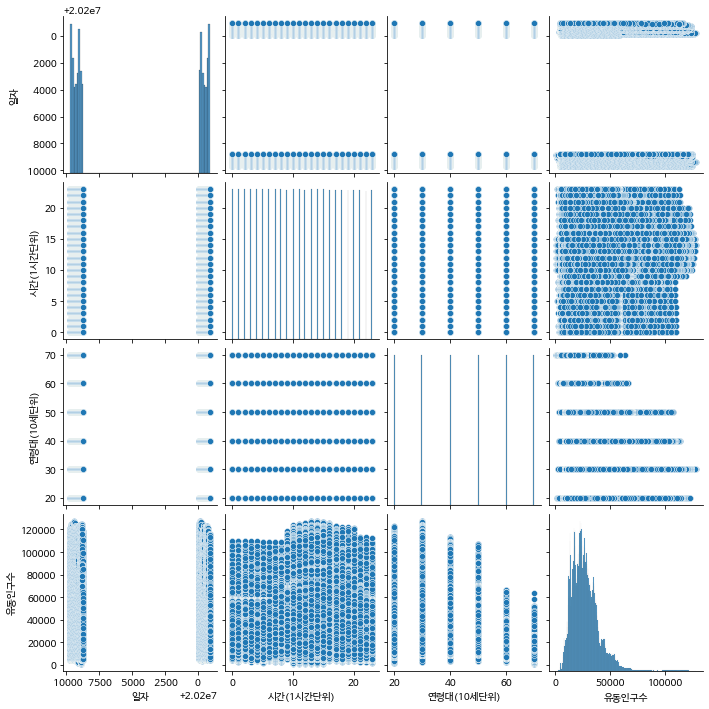

In [19]:
sns.pairplot(df)

In [26]:
df_군구 = pd.Series(df.groupby(['군구'])['유동인구수'])

In [40]:
l = [(x, a) for (x, a) in df_군구]

In [42]:
len(l)

25

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


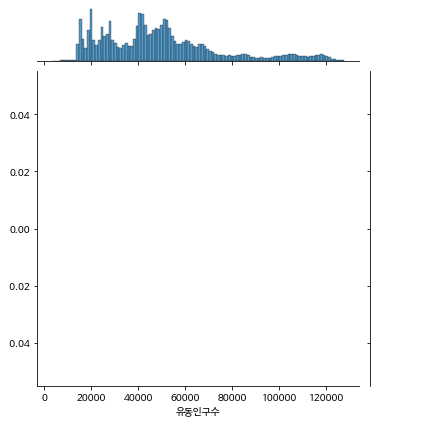

In [55]:
sns.jointplot(l[0][1])